In [1]:
import matplotlib.pyplot as plt
import numpy as np

In [2]:
mean1 = [-0.7, 0]
mean2 = [0.7, 0]
covariance = [[1,1], [1,2]]

Point0: Blue:1.9346404969076156-0.19596297288543993 	Red: 1.4624764145558895-0.9931848369870762
Point1: Blue:2.06818036301990560.7667377451628313 	Red: 1.3499814520164435-0.9492875567814901
Point2: Blue:1.0635713475436348-0.3272103350140383 	Red: 1.174411495269184-0.47897200569815035
Point3: Blue:1.6496093409903421.3347509757184415 	Red: 1.13992711618577360.07952332403828756
Point4: Blue:-0.07317870882683453-0.9912827216398085 	Red: 0.5361813086184233-0.8651144411841912
Point5: Blue:0.762021944772891-1.0180731435583619 	Red: -0.11052440811253506-2.23923727605527
Point6: Blue:1.0502089548049263-0.08535073459095965 	Red: 0.08421945462678915-0.28178422120992824
Point7: Blue:0.493254646497908072.143147096118565 	Red: 1.4000123952740721.8380299694283928
Point8: Blue:0.86582920638037390.27816211018236137 	Red: 2.27175212622040861.763041445205684
Point9: Blue:-0.8266656197930768-1.5032752327190615 	Red: 0.0005940563740207683-1.1990611007837184


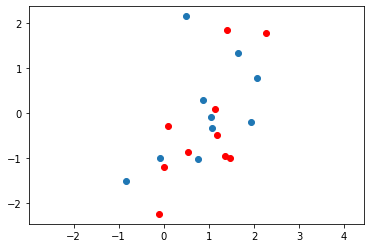

In [3]:
x1, y1 = np.random.multivariate_normal(mean2, covariance, 10).T
x2, y2 = np.random.multivariate_normal(mean2, covariance, 10).T
for i, (a,b,c,d) in enumerate(zip(x1,y1,x2,y2)):
    print (f'Point{i}: Blue:{a}{b} \tRed: {c}{d}')
plt.plot(x1, y1, 'o')
plt.plot(x2, y2, 'or')
plt.axis('equal')
plt.show()

Point0: Blue:0.27039315807216070.4910550569123593 	Red: 1.4306760387751378-0.260285140919551
Point1: Blue:-1.3826750679404796-1.6417773346863385 	Red: 0.3112898177904103-0.7775602771920423
Point2: Blue:1.26809683905659250.6106739924098336 	Red: 0.7412822121799395-0.2708816514570468
Point3: Blue:-0.19668616521990412-1.9533905631674613 	Red: 1.09615029858769561.5476823209598043
Point4: Blue:1.08224204628738450.30752342435891933 	Red: 2.0053756721229172-0.18099034269760253
Point5: Blue:2.39029469745078640.6090132679577229 	Red: -0.162311834635565530.6110581152819824
Point6: Blue:0.90028191784924760.7919419863262278 	Red: 0.6492289527142742-1.2532583757546445
Point7: Blue:1.79872688333538331.8708825090243208 	Red: 2.23164085754784133.029547633476688
Point8: Blue:0.6092692356185375-0.21826770589481648 	Red: 1.69322505148811022.643081971172905
Point9: Blue:-0.22005684876410614-2.289743106652474 	Red: -0.4659488950202355-2.0757060166382475
Point10: Blue:0.60496825328106161.7429180587800996 	R

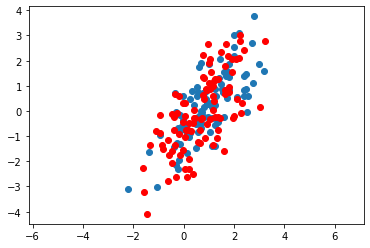

In [4]:
x3, y3 = np.random.multivariate_normal(mean2, covariance, 100).T
x4, y4 = np.random.multivariate_normal(mean2, covariance, 100).T
for i, (a,b,c,d) in enumerate(zip(x3,y3,x4,y4)):
    print (f'Point{i}: Blue:{a}{b} \tRed: {c}{d}')
plt.plot(x3, y3, 'o')
plt.plot(x4, y4, 'or')
plt.axis('equal')
plt.show()

### Mean and Covariance are known

In [57]:
#create one X for all points
X=[]
y=[]
for a,b,c,d in zip(x1,y1,x2,y2):
    p = [a,b]
    q = [c,d]
    X.append(p)
    y.append(0)
    X.append(q)
    y.append(1)

In [68]:
class LDA():
    
    def __init__(self, mean1, mean2, cov):
        self.w = None
        self.mean1 = mean1
        self.mean2 = mean2
        self.cov = cov
    
    def fit(self):
        
        #mean difference
        mean_diff = np.atleast_1d(self.mean1 - self.mean2)
        # covariance
        cov = self.cov
        
        # W =  (mean_diff/cov)
        self.w = np.linalg.pinv(cov).dot(mean_diff)
        
        return self.w

    def predict(self, X):
        y_pred = []
        for sample in X:
            # find output for each samples
            h = sample.T.dot(self.w)
            # get predictions
            y = 1 * (h < 0)
            y_pred.append(y)
        return y_pred
    

In [69]:
lda_p = LDA(np.array(mean1), np.array(mean2), np.array(covariance))
W = lda_p.fit()
print (W)

[-2.8  1.4]


In [70]:
#testing 
y_pred = lda_p.predict(np.array(X))
print (y_pred)

[1, 1, 1, 0, 1, 1, 1, 0, 0, 1, 0, 1, 1, 1, 0, 1, 1, 0, 0, 1]


In [71]:
correct = []
#Accuracy
for i,j in zip(y,y_pred):
    if i==j:
        correct.append(1)
print (f'Accuracy: {sum(correct)/len(y)*100}')        

Accuracy: 55.00000000000001


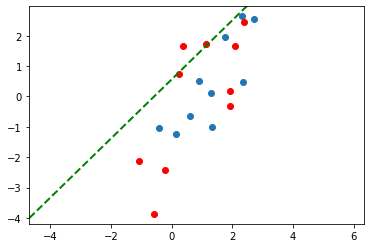

In [54]:
x1, y1 = np.random.multivariate_normal(mean2, covariance, 10).T
x2, y2 = np.random.multivariate_normal(mean2, covariance, 10).T
plt.plot(x1, y1, 'o')
plt.plot(x2, y2, 'or')
plt.plot(W, W, 'go--', linewidth=2, transform=ax.transAxes)
plt.axis('equal')
plt.show()

### Mean is known and covariance is unknown

In [76]:
covar = np.cov(np.array(X).T)
print (covar)

[[1.07044234 0.84423967]
 [0.84423967 1.89253741]]


In [93]:
lda_no_cov = LDA(np.array(mean1), np.array(mean2), np.array(covar))
W_no_cov = lda_no_cov.fit()
print (W_no_cov)

[-2.01776639  0.9001029 ]


In [94]:
#testing 
y_pred_no_cov = lda_p.predict(np.array(X))
print (y_pred_no_cov)

[1, 1, 1, 0, 1, 1, 1, 0, 0, 1, 0, 1, 1, 1, 0, 1, 1, 0, 0, 1]


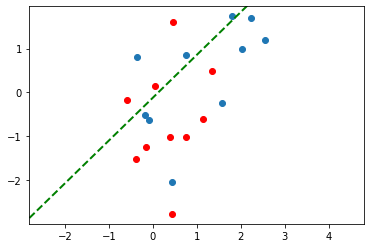

In [91]:
x1, y1 = np.random.multivariate_normal(mean2, covariance, 10).T
x2, y2 = np.random.multivariate_normal(mean2, covariance, 10).T
plt.plot(x1, y1, 'o')
plt.plot(x2, y2, 'or')
plt.plot(W_no_cov, W_no_cov, 'go--', linewidth=2, transform=ax.transAxes)
plt.axis('equal')
plt.show()

In [96]:
cor = []
#Accuracy
for i,j in zip(y,y_pred_no_cov):
    if i==j:
        cor.append(1)
print (f'Accuracy: {sum(cor)/len(y)*100}')    

Accuracy: 55.00000000000001
